In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [35]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
target_names = iris.target_names

# Dimensionality Reduction Techniques
# Principal Component Analysis (PCA)


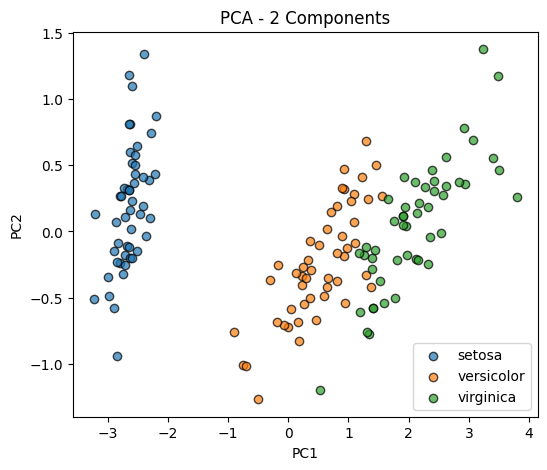

Explained Variance (2 PCs): [0.92461872 0.05306648]
Total Variance (2 PCs): 0.9776852063187963

Explained Variance (3 PCs): [0.92461872 0.05306648 0.01710261]
Total Variance (3 PCs): 0.9947878161267256

Model Accuracy Comparison:
Original Features (4D): 1.0
PCA (2D): 1.0
PCA (3D): 1.0


In [36]:

# PCA with 2 Components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X)

plt.figure(figsize=(6,5))
for target, color in zip(range(3), ["red", "green", "blue"]):
    plt.scatter(X_pca_2[y==target, 0], X_pca_2[y==target, 1], 
                label=target_names[target], alpha=0.7, edgecolors="k")
plt.title("PCA - 2 Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

print("Explained Variance (2 PCs):", pca_2.explained_variance_ratio_)
print("Total Variance (2 PCs):", sum(pca_2.explained_variance_ratio_))

# PCA with 3 Components
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X)

print("\nExplained Variance (3 PCs):", pca_3.explained_variance_ratio_)
print("Total Variance (3 PCs):", sum(pca_3.explained_variance_ratio_))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_original = RandomForestClassifier(n_estimators=100, random_state=42)
rf_original.fit(X_train, y_train)
y_pred_orig = rf_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_orig)

# Train/test split on PCA-reduced features 
X_train_p2, X_test_p2, y_train_p2, y_test_p2 = train_test_split(X_pca_2, y, test_size=0.2, random_state=42)
rf_p2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_p2.fit(X_train_p2, y_train_p2)
y_pred_p2 = rf_p2.predict(X_test_p2)
acc_p2 = accuracy_score(y_test_p2, y_pred_p2)

# Train/test split on PCA-reduced features 
X_train_p3, X_test_p3, y_train_p3, y_test_p3 = train_test_split(X_pca_3, y, test_size=0.2, random_state=42)
rf_p3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_p3.fit(X_train_p3, y_train_p3)
y_pred_p3 = rf_p3.predict(X_test_p3)
acc_p3 = accuracy_score(y_test_p3, y_pred_p3)

print("\nModel Accuracy Comparison:")
print("Original Features (4D):", acc_original)
print("PCA (2D):", acc_p2)
print("PCA (3D):", acc_p3)

# Linear Discriminant Analysis (LDA)

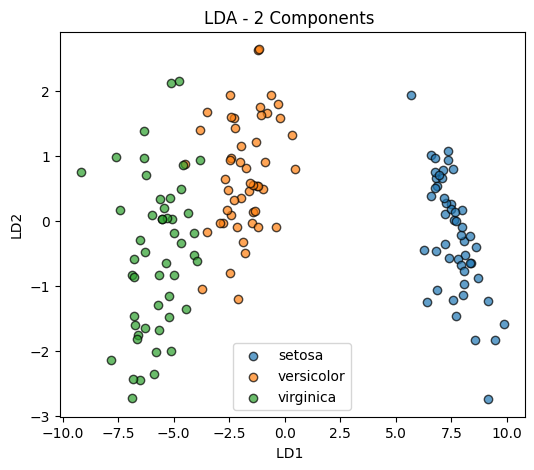

Explained Variance Ratio (LDA): [0.9912126 0.0087874]


In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(6,5))
for target, color in zip(range(3), ["red", "green", "blue"]):
    plt.scatter(X_lda[y==target, 0], X_lda[y==target, 1], label=target_names[target], alpha=0.7, edgecolors="k")
plt.title("LDA - 2 Components ")
plt.xlabel("LD1 ")
plt.ylabel("LD2")
plt.legend()
plt.show()

print("Explained Variance Ratio (LDA):", lda.explained_variance_ratio_)

# t-Distributed Stochastic Neighbor Embedding (t-SNE)

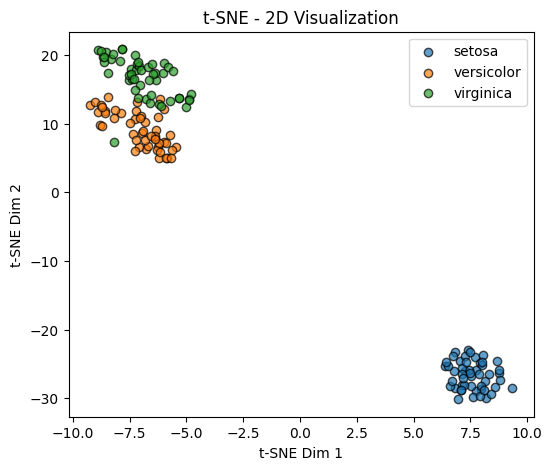

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200, max_iter=1000)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(6,5))
for target, color in zip(range(3), ["red", "green", "blue"]):
    plt.scatter(X_tsne[y==target, 0], X_tsne[y==target, 1], label=target_names[target], alpha=0.7, edgecolors="k")
plt.title("t-SNE - 2D Visualization")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend()
plt.show()

# Comparison of PCA VS LDA VS t-SNE

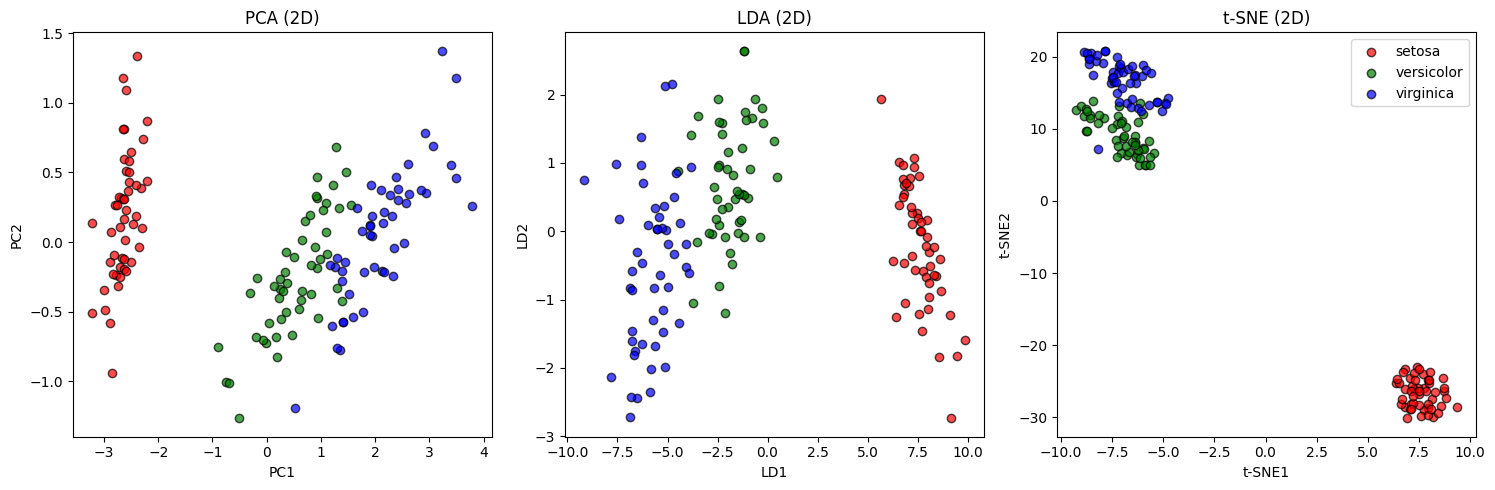

In [39]:
colors = ["red", "green", "blue"]

# PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# LDA 
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200, max_iter=1000)
X_tsne = tsne.fit_transform(X)

fig, axes = plt.subplots(1, 3, figsize=(15,5))

# PCA Plot
for target, color in zip(range(3), colors):
    axes[0].scatter(X_pca[y==target, 0], X_pca[y==target, 1], 
                    label=target_names[target], alpha=0.7, edgecolors="k", color=color)
axes[0].set_title("PCA (2D)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# LDA Plot
for target, color in zip(range(3), colors):
    axes[1].scatter(X_lda[y==target, 0], X_lda[y==target, 1], 
                    label=target_names[target], alpha=0.7, edgecolors="k", color=color)
axes[1].set_title("LDA (2D)")
axes[1].set_xlabel("LD1")
axes[1].set_ylabel("LD2")

# t-SNE Plot
for target, color in zip(range(3), colors):
    axes[2].scatter(X_tsne[y==target, 0], X_tsne[y==target, 1], 
                    label=target_names[target], alpha=0.7, edgecolors="k", color=color)
axes[2].set_title("t-SNE (2D)")
axes[2].set_xlabel("t-SNE1")
axes[2].set_ylabel("t-SNE2")

# Add one legend for all plots
axes[2].legend(loc="best")
plt.tight_layout()
plt.show()

# Autoencoders (Neural Networks for Dimensionality Reduction)

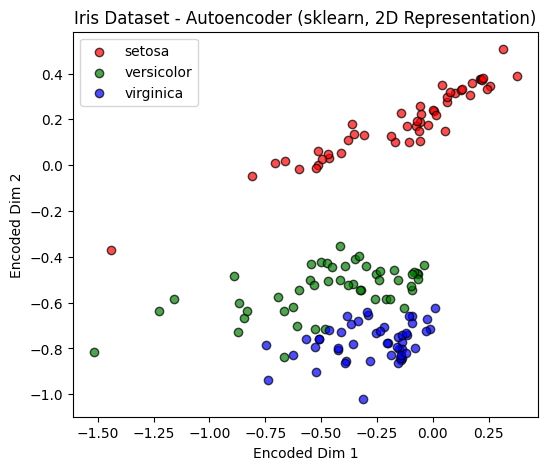

In [40]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Autoencoder using MLP 
autoencoder = MLPRegressor(hidden_layer_sizes=(16, 8, 2, 8, 16),activation="tanh",solver="adam",max_iter=5000, random_state=42)

autoencoder.fit(X_scaled, X_scaled)
def get_hidden_representation(model, X):
    hidden_weights = model.coefs_[0]        
    hidden_bias = model.intercepts_[0]      
    h1 = np.maximum(0, np.dot(X, hidden_weights) + hidden_bias)  # relu

    bottleneck_weights = model.coefs_[1]    
    bottleneck_bias = model.intercepts_[1]
    encoded = np.dot(h1, bottleneck_weights) + bottleneck_bias
    return encoded

X_encoded = get_hidden_representation(autoencoder, X_scaled)

colors = ["red", "green", "blue"]
plt.figure(figsize=(6,5))
for target, color in zip(range(3), colors):
    plt.scatter(X_encoded[y==target, 0], X_encoded[y==target, 1],
                label=target_names[target], alpha=0.7, edgecolors="k", color=color)
plt.title("Iris Dataset - Autoencoder (sklearn, 2D Representation)")
plt.xlabel("Encoded Dim 1")
plt.ylabel("Encoded Dim 2")
plt.legend()
plt.show()

# Factor Analysis

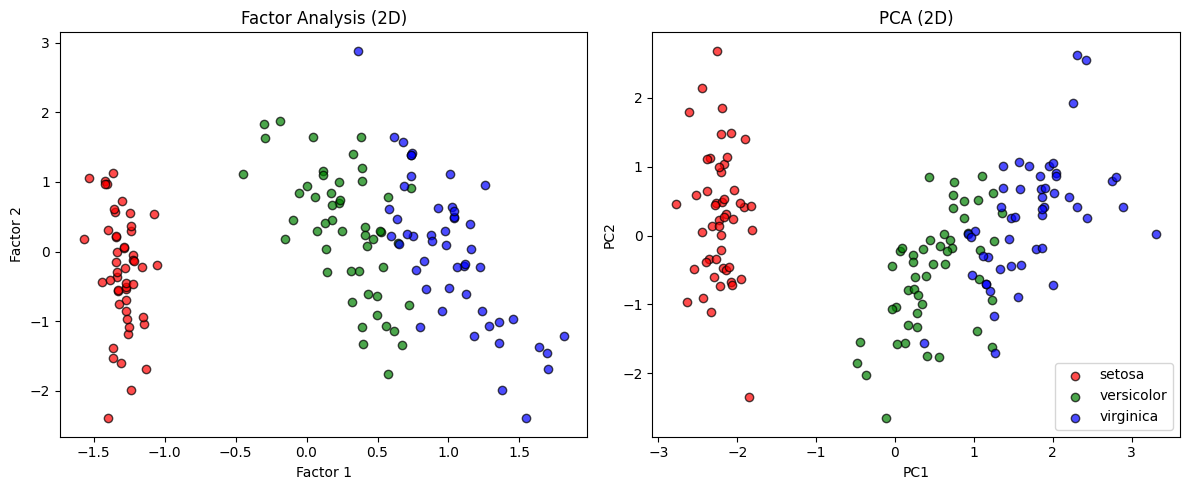


Factor Loadings (how features contribute to each factor):

                    Factor1   Factor2
sepal length (cm)  0.880960 -0.447287
sepal width (cm)  -0.416916 -0.553900
petal length (cm)  0.999189  0.019153
petal width (cm)   0.962289  0.058402


In [41]:
from sklearn.decomposition import FactorAnalysis, PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fa = FactorAnalysis(n_components=2, random_state=42)
X_fa = fa.fit_transform(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

colors = ["red", "green", "blue"]

fig, axes = plt.subplots(1, 2, figsize=(12,5))

for target, color in zip(range(3), colors):
    axes[0].scatter(X_fa[y==target, 0], X_fa[y==target, 1],
                    label=target_names[target], alpha=0.7, edgecolors="k", color=color)
axes[0].set_title("Factor Analysis (2D)")
axes[0].set_xlabel("Factor 1")
axes[0].set_ylabel("Factor 2")

# PCA plot
for target, color in zip(range(3), colors):
    axes[1].scatter(X_pca[y==target, 0], X_pca[y==target, 1],
                    label=target_names[target], alpha=0.7, edgecolors="k", color=color)
axes[1].set_title("PCA (2D)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

axes[1].legend(loc="best")
plt.tight_layout()
plt.show()

fa_loadings = pd.DataFrame(fa.components_.T,
                           index=iris.feature_names,
                           columns=["Factor1", "Factor2"])
print("\nFactor Loadings (how features contribute to each factor):\n")
print(fa_loadings)

# ICA

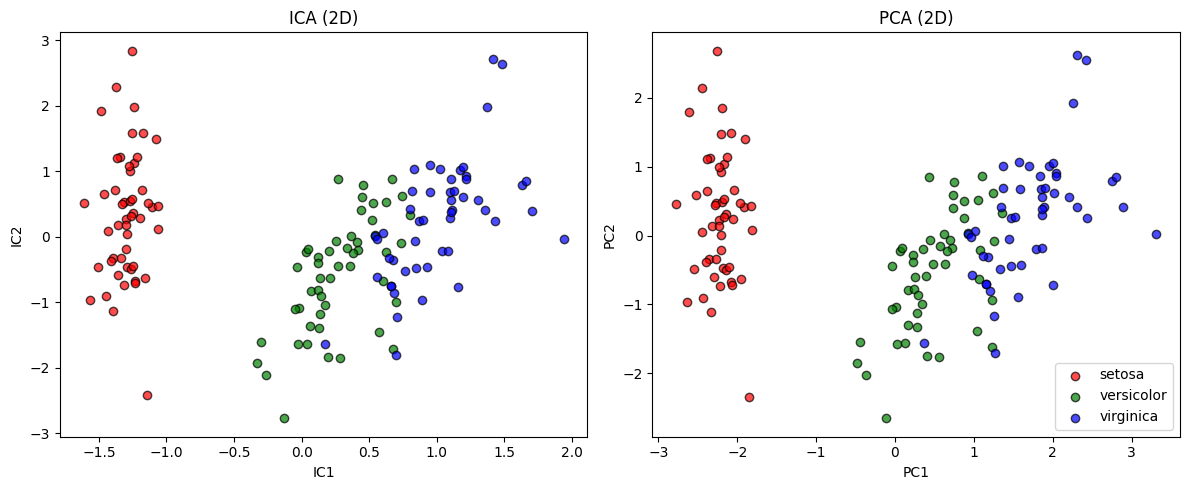

In [42]:
from sklearn.decomposition import FastICA, PCA

ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

colors = ["red", "green", "blue"]

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# ICA plot
for target, color in zip(range(3), colors):
    axes[0].scatter(X_ica[y==target, 0], X_ica[y==target, 1],label=target_names[target], alpha=0.7, edgecolors="k", color=color)
axes[0].set_title("ICA (2D)")
axes[0].set_xlabel("IC1")
axes[0].set_ylabel("IC2")

for target, color in zip(range(3), colors):
    axes[1].scatter(X_pca[y==target, 0], X_pca[y==target, 1],label=target_names[target], alpha=0.7, edgecolors="k", color=color)
axes[1].set_title("PCA (2D)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

axes[1].legend(loc="best")
plt.tight_layout()
plt.show()